## Reproduces Figure 2a, c, d, e in Lauer et al., Nature Methods 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from utils import plot_detection_performance

%matplotlib inline

Fig 2a

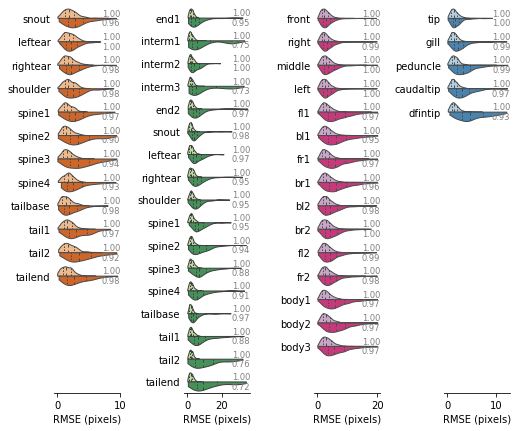

In [2]:
PCUTOFF = 0.6
TOL = 0.99
NITER = 60000
PLOT_TYPE = 'violin'

fig, axes = plt.subplots(1, 4, tight_layout=True, figsize=(7.3, 6.1))
with open('../data/fig2/length_trimice.pickle', 'rb') as f:
    length = pickle.load(f)
df1, _ = plot_detection_performance(
    '../data/fig2/dist_trimice.csv',
    '../data/fig2/meta_trimice.pickle',
    pcutoff=PCUTOFF,
    tol=TOL,
    pck_threshold=length,
    cmap="Oranges",
    ax=axes[0],
)

with open('../data/fig2/length_pups.pickle', 'rb') as f:
    length = pickle.load(f)
df2, _ = plot_detection_performance(
    '../data/fig2/dist_pups.csv',
    '../data/fig2/meta_pups.pickle',
    pcutoff=PCUTOFF,
    tol=TOL,
    pck_threshold=length,
    cmap="YlGn",
    ax=axes[1],
)

with open('../data/fig2/length_marmosets.pickle', 'rb') as f:
    length = pickle.load(f)
df3, _ = plot_detection_performance(
    '../data/fig2/dist_marmosets.csv',
    '../data/fig2/meta_marmosets.pickle',
    pcutoff=PCUTOFF,
    tol=TOL,
    pck_threshold=length,
    cmap="PuRd",
    ax=axes[2],
)

with open('../data/fig2/length_fish.pickle', 'rb') as f:
    length = pickle.load(f)
df4, _ = plot_detection_performance(
    '../data/fig2/dist_fish.csv',
    '../data/fig2/meta_fish.pickle',
    pcutoff=PCUTOFF,
    tol=TOL,
    pck_threshold=length,
    cmap="Blues",
    ax=axes[3],
)
max_bodyparts = max(df["bodyparts"].unique().size for df in (df1, df2, df3, df4))
for ax in axes:
    ax.set_yticks(np.arange(max_bodyparts))
fig.savefig("fig2a.jpg", dpi=600)

Fig 2c

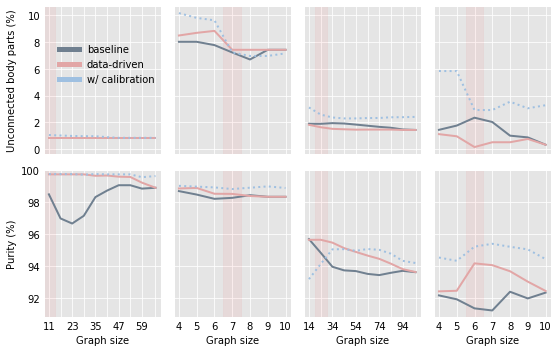

In [3]:
pickle_files = [
    '../data/fig2/assembly_trimice.pickle',
    '../data/fig2/assembly_pups.pickle',
    '../data/fig2/assembly_marmosets.pickle',
    '../data/fig2/assembly_fish.pickle',
]

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 4, figsize=(7.865, 5), tight_layout=True, sharex='col', sharey='row')
axes[0, 0].set_ylabel('Unconnected body parts (%)', fontsize=10)
axes[0, 0].set_ylim(0, 1)
axes[1, 0].set_ylabel('Purity (%)', fontsize=10)
colors = ['slategray', '#e2a6a6', "#9fc0e1"]
for n, pickle_file in enumerate(pickle_files):
    ax = axes[:, n]
    with open(pickle_file, 'rb') as file:
        df = pickle.load(file)[0]
    x = df.columns.to_numpy()
    labels = ['naive', 'best', 'calib']
    for label, color in zip(labels, colors):
        miss = df.loc[(label, 'miss', 'mean')].to_numpy().T * 100
        pure = df.loc[(label, 'purity', 'mean')].to_numpy().T * 100
        ls = 'solid' if label != 'calib' else 'dotted'
        ax[0].plot(
            x, miss, c=color, lw=2, ls=ls,
        )
        ax[1].plot(
            x, pure, c=color, lw=2, ls=ls,
        )
    miss = df.loc[('best', 'miss', 'mean')].to_numpy().T * 100
    pure = df.loc[('best', 'purity', 'mean')].to_numpy().T * 100
    q = ((1 - miss / 100) + (pure / 100)) / 2
    ind = np.argmax(q)
    mid = x[ind]
    off = (mid - x[ind + 1]) / 2
    prev = ax[0].get_xlim()
    ax[0].axvspan(x[ind] - off, x[ind] + off, alpha=0.05, color='red')
    ax[1].axvspan(x[ind] - off, x[ind] + off, alpha=0.05, color='red')
    ax[0].set_xlim(prev)
    ax[-1].set_xticks(x)
    ax[-1].set_xlabel('Graph size', fontsize=10)
    ax[-1].yaxis.get_major_locator().set_params(integer=True)
    if n in (0, 2):
        for label in ax[-1].get_xticklabels()[1::2]:
            label.set_visible(False)
for ax in axes.flatten():
    ax.tick_params(axis='y', length=0)
    ax.tick_params(axis='x', length=0)
axes[1, 0].set_ylim((axes[1, 0].get_ylim()[0], 100))
fig.align_ylabels()
patches = [
    plt.Line2D([0, 0], [0, 0], color=colors[0], label="baseline", lw=5),
    plt.Line2D([0, 0], [0, 0], color=colors[1], label="data-driven", lw=5),
    plt.Line2D([0, 0], [0, 0], color=colors[2], label="w/ calibration", lw=5),
]
fig.legend(
    handles=patches,
    loc="right",
    frameon=False,
    borderaxespad=0.0,
    bbox_to_anchor=[0.28, 0.8]
)
axes[0, 0].autoscale(axis='y')
# axes[0, 0].set_ylim(-0.5, 12.5)
# axes[1, 0].set_ylim(92, 100)
for ax in axes.flat:
    ax.yaxis.label.set_color('black')
    ax.xaxis.label.set_color('black')
    ax.tick_params(axis='y', colors='black')
    ax.tick_params(axis='x', colors='black')

axes[0, 0].yaxis.get_major_locator().set_params(integer=True)
plt.savefig('fig2c.jpg', dpi=600)

plt.show()

Fig 2d

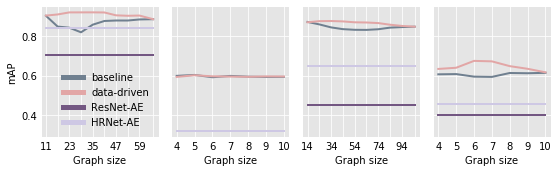

In [4]:
plt.style.use('ggplot')

with open('../data/fig2/map_mmpose.pickle', 'rb') as f:
    map_mmpose = pickle.load(f)

with open('../data/fig2/map_dlc.pickle', 'rb') as f:
    base, data = pickle.load(f)

fig, axes = plt.subplots(1, 4, figsize=(7.865, 2.5), tight_layout=True, sharey='row')
axes[0].set_ylabel('mAP', fontsize=10)
colors = ['slategray', '#e2a6a6', "#9fc0e1"]
cc1 = (115/255, 87/255, 130/255)
cc2 = '#CEC8E4'
xx = [
    [11, 17, 23, 29, 35, 41, 47, 53, 59, 66],
    [ 4,  5,  6,  7,  8,  9, 10],
    [ 14,  24,  34,  44,  54,  64,  74,  84,  94, 105],
    [ 4,  5,  6,  7,  8,  9, 10],
]
for n, pickle_file in enumerate(pickle_files):
    ax = axes[n]
    x = xx[n]
    ax.plot(x, base[n], c=colors[0], lw=2)
    ax.plot(x, data[n], c=colors[1], lw=2)
    ax.plot(x, [map_mmpose[n][0]] * len(x), c=cc1, lw=2)
    ax.plot(x, [map_mmpose[n][1]] * len(x), c=cc2, lw=2)
    ax.set_xticks(x)
    ax.set_xlabel('Graph size', fontsize=10)
    ax.yaxis.get_major_locator().set_params(integer=True)
    if n in (0, 2):
        for label in ax.get_xticklabels()[1::2]:
            label.set_visible(False)

for ax in axes.flatten():
    ax.tick_params(axis='y', length=0)
    ax.tick_params(axis='x', length=0)

fig.align_ylabels()
patches = [
    plt.Line2D([0, 0], [0, 0], color=colors[0], label="baseline", lw=5),
    plt.Line2D([0, 0], [0, 0], color=colors[1], label="data-driven", lw=5),
    plt.Line2D([0, 0], [0, 0], color=cc1, label="ResNet-AE", lw=5),
    plt.Line2D([0, 0], [0, 0], color=cc2, label="HRNet-AE", lw=5),
]
fig.legend(
    handles=patches,
    loc="right",
    frameon=False,
    borderaxespad=0.0,
    bbox_to_anchor=[0.27, 0.4]
)
axes[0].autoscale(axis='y')
for ax in axes.flat:
    ax.yaxis.label.set_color('black')
    ax.xaxis.label.set_color('black')
    ax.tick_params(axis='y', colors='black')
    ax.tick_params(axis='x', colors='black')

fig.savefig('fig2d.jpg', dpi=600)

Fig 2e

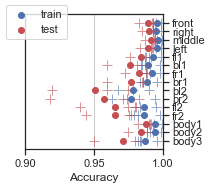

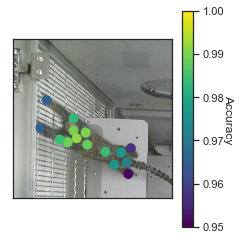

In [5]:
import seaborn as sns
sns.set_theme(style='ticks')
from skimage.io import imread

bpts = [
    'Front', 'Right', 'Middle', 'Left',
    'FL1', 'BL1', 'FR1', 'BR1', 'BL2', 'BR2', 'FL2', 'FR2',
    'Body1', 'Body2', 'Body3',
]
nbpts = len(bpts)
accu = np.empty((3, nbpts, 2))
with open('../data/fig2/ids.pickle', 'rb') as file:
    data = pickle.load(file)
accu[0] = data['ids_baseline_60000.pickle'][1]
accu[1] = data['ids_baseline2_60000.pickle'][1]
accu[2] = data['ids_baseline3_60000.pickle'][1]
av = accu.mean(axis=0)
fig, ax = plt.subplots(tight_layout=True, figsize=(3, 2.7))
ax.set_xlabel('Accuracy')
ax.set_xlim(0.9, 1.0)
ax.set_xticks([0.9, 0.95, 1.0])
ax.scatter(av[:, 0], range(nbpts), c='b', label='train')
ax.scatter(av[:, 1], range(nbpts), c='r', label='test')
for ac in accu:
    ax.plot(ac[:, 0], range(nbpts), 'b+', alpha=0.6, ms=10)
    ax.plot(ac[:, 1], range(nbpts), 'r+', alpha=0.6, ms=10)
ax.set_yticks(range(nbpts))
ax.set_yticklabels(map(str.lower, bpts))
ax.invert_yaxis()
ax.xaxis.grid(True)
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
fig.legend(loc='upper left')
fig.savefig('fig2e_perf.jpg', dpi=600)

coords = np.load('../data/fig2/coords.npy')
fig, ax = plt.subplots(tight_layout=True, figsize=(3.5, 3.5))
img = imread('../data/fig2/marmo_img.png')
ax.imshow(img)
sc = ax.scatter(*coords.T, c=av[:, 1], vmin=0.95, vmax=1, cmap='viridis', s=80)
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Accuracy', rotation=270, va='center')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('fig2e_img.jpg', dpi=600)